# Encodage MP3
## Le projet:
Nous devons partir d'un fichier audio .wav, donc un fichier audio non compressé, et le traiter pour en sortir un fichier audio en format .mp3
## Le format WAV
Le format .wav est un format audio non compressé comme dit précedemment. L'échantillon sur lequel nous avons travaillé est un échantillon avec une fréquence d'échantillonnage de 44 100 Hz, c'est-à-dire qu'il y a 44 100 "points" pris par seconde sur le signal analogique de départ pour en faire un signal numérique.
Les données de notre signal sont codées sur 16 bits (nous avons ainsi $2^{16}$ valeurs différentes possibles) et nous avons un son stéréo (un son mono gauche, un son mono droit).
Voici comment nous récupérons ces données :

In [1]:
%pylab inline
import scipy
import scipy.io.wavfile
scipy.io.wavfile.read('test.wav')

Populating the interactive namespace from numpy and matplotlib


(44100, array([[  0,   0],
        [ -1,   0],
        [  0,   0],
        ...,
        [144, 163],
        [113, 147],
        [ 73,  88]], dtype=int16))

Le problème ici étant la taille des données à traiter nous allons effectuer les traitements d'encodage MP3 sur une plus petite portion.

In [2]:
freq, data = scipy.io.wavfile.read('test.wav')
print(len(data))
# Nous avons choisi de prendre 2^20 echantillons
portionData = data[:2**20]
print(len(portionData))

8833224
1048576


Voici le signal récupéré:

In [3]:
def afficheSignalTemps(donneeTemps, freq):
    n = len(donneeTemps) #Taille du signal
    te = 1.0 / freq #Periode d'échantillonnage
    duree = ((1.0 * (n)) / (freq)) #Duree du signal
    t = zeros(n) #Construction 
    for k in range(n):
        t[k] = te*k
    figure(figsize=(12,4))
    plot(t, donneeTemps)
    xlabel("t (s)")
    ylabel("amplitude") 
    axis([0, duree, donneeTemps.min(), donneeTemps.max()])
    grid()

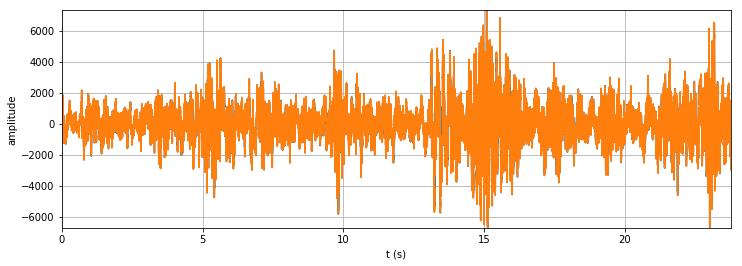

In [4]:
afficheSignalTemps(portionData, freq)

Nous allons effectuer une fft (par partie de 10 échantillons pour améliorer la précision) pour avoir un aperçu du signal en fréquences:

In [5]:
def fourierparpartie(data, debut, fin, taillefenetre):
    res = []
    taille = fin - debut
    reste = taille % taillefenetre
    newtaille = int((taille - reste) / taillefenetre)
    for k in range(0, newtaille):
        liste = data[(taillefenetre * k):(taillefenetre * (k+1))]
        tmp = numpy.fft.fft2(liste)
        res = res + [tmp]
    if reste > 0:
        liste = data[(fin - reste): fin]
        res = res + [numpy.fft.fft2(liste)]
    return res

In [6]:
#donneeFreq = fourierparpartie(portionData, 0, len(portionData), 10)

In [7]:
def plotMono(snd, sampFreq):

    #sampFreq, snd = scipy.io.wavfile.read(file_name)

    snd = snd / (2.**15) #convert sound array to float pt. values

    s1 = snd[:,0] #left channel
    soundLeft = s1

    s2 = snd[:,1] #right channel
    soundRight = s2

    n = len(s1)
    p = fft.fft(s1) # take the fourier transform of left channel
    ma_var = p

    m = len(s2) 
    p2 = fft.fft(s2) # take the fourier transform of right channel
    ma_var2 = p2

    nUniquePts = int(ceil((n+1)/2.0))
    print(nUniquePts)
    p = p[0:nUniquePts]
    p = abs(p)

    mUniquePts = int(ceil((m+1)/2.0))
    p2 = p2[0:mUniquePts]
    p2 = abs(p2)

    #'''
    #Left Channel
    #'''
    p = p / float(n) # scale by the number of points so that
                     # the magnitude does not depend on the length 
                     # of the signal or on its sampling frequency  
    p = p**2  # square it to get the power 




# multiply by two (see technical document for details)
# odd nfft excludes Nyquist point
    if n % 2 > 0: # we've got odd number of points fft
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

    freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n);
    plt.plot(freqArray/1000, 10*log10(p), color='k')
    plt.xlabel('LeftChannel_Frequency (kHz)')
    plt.ylabel('LeftChannel_Power (dB)')
    plt.show()

    #'''
    #Right Channel
    #'''
    p2 = p2 / float(m) # scale by the number of points so that
             # the magnitude does not depend on the length 
             # of the signal or on its sampling frequency  
    p2 = p2**2  # square it to get the power 




    # multiply by two (see technical document for details)
    # odd nfft excludes Nyquist point
    if m % 2 > 0: # we've got odd number of points fft
         p2[1:len(p2)] = p2[1:len(p2)] * 2
    else:
         p2[1:len(p2) -1] = p2[1:len(p2) - 1] * 2 # we've got even number of points fft

    freqArray2 = arange(0, mUniquePts, 1.0) * (sampFreq / m);
    plt.plot(freqArray2/1000, 10*log10(p2), color='k')
    plt.xlabel('RightChannel_Frequency (kHz)')
    plt.ylabel('RightChannel_Power (dB)')
    plt.show()
    #return freqArray, freqArray2
    return ma_var, ma_var2, soundLeft, soundRight

524289


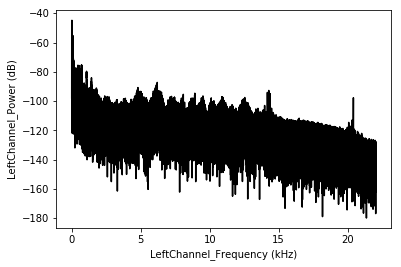

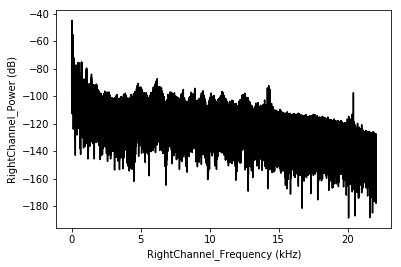

In [8]:
freqGauche, freqDroite, monoGauche, monoDroit = plotMono(portionData, freq)

23.777233560090703


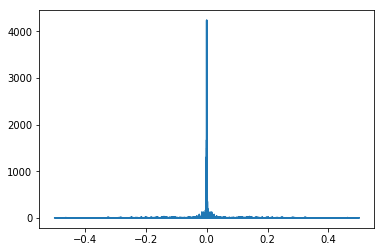

In [9]:
X = freqGauche
duree = ((1.0 * (len(monoGauche))) / (freq)) #Duree du signal
test = scipy.linspace(0, len(X), 30)
print(duree)
#N = 2**20
#Xdb = 20*scipy.log10(scipy.absolute(X))
#f = scipy.linspace(0, freq, N, endpoint=False)
#pylab.plot(f, Xdb)
#pylab.xlim(0, 50000)
frequency = fft.fftfreq(monoGauche.size)
plot(frequency, abs(X))

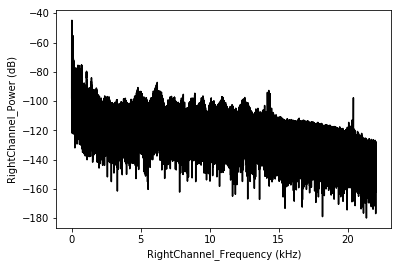

In [10]:
m = len(X)
p2 = freqGauche / float(m) # scale by the number of points so that
             # the magnitude does not depend on the length 
             # of the signal or on its sampling frequency  
p2 = p2**2  # square it to get the power
mUniquePts = int(ceil((m+1)/2.0))
p2 = p2[0:mUniquePts]
p2 = abs(p2)
if m % 2 > 0: # we've got odd number of points fft
    p2[1:len(p2)] = p2[1:len(p2)] * 2
else:
    p2[1:len(p2) -1] = p2[1:len(p2) - 1] * 2 # we've got even number of points fft
freqArray2 = arange(0, mUniquePts, 1.0) * (freq / m);
plt.plot(freqArray2/1000, 10*log10(p2), color='k')
plt.xlabel('RightChannel_Frequency (kHz)')
plt.ylabel('RightChannel_Power (dB)')
plt.show()

Nous allons commencer à traiter la partie encodage .mp3 et pour cela nous allons vous expliquer tout d'abord le principe.
## Le format MP3
Le format .mp3 est un format audio compressé avec perte d'information. Cependant, son principal avantage est qu'il permet de gagner un facteur 10 sur le poids final par rapport à un format non compressé comme le .wav (le facteur est plus ou moins important selon si l'on échantillonne plus ou moins finement).
Pour cela, il faut effectuer divers traitements certains induisant une perte d'informations d'autres non.
### I.Les traitements induisant une perte d'informations:
#### I.1.Suppression des fréquences non "importantes":
Ici, pour réduire la taille du fichier audio, les propriétés de l'oreille humaine sont utilisées.
L'oreille humaine ne perçoit les sons que dans un intervalle de fréquences bien précis: de 20Hz à 20kHz.
Toutes les fréquences au-dessus ou en-dessous de cet intervalle seront supprimées.
Nous avons cependant fait le choix de ne pas les supprimer mais de mettre leurs valeurs à 0 nous permettant de garder, à la réécriture, un debit constant. Le gain en poids se fera lors de la partie codage (Huffman).
Voici notre implantation de cette propriété:

In [11]:
def intervalleSuppr(donneeFreq):
    res = []
    for freq in donneeFreq:
        if (abs(freq) > 20000) or (abs(freq) < 20): # On prend le module pour pouvoir comparer
            freq = 0
        res += [freq]
    return asarray(res)

In [12]:
def intervalleSuppr2(donneefreq, signal):
    time = np.linspace(0, len(donneefreq), len(donneefreq))
    frequency = fft.fftfreq(signal.size, d=1/44100)
    print(frequency)
    donneefreq[(frequency < 20)] = 0
    donneefreq[(frequency > 20000)] = 0
    print("time")
    print(time)
    print("time")
    plot(abs(donneefreq), frequency)
    return donneefreq

In [13]:
def intervalleSuppr3(donneeFreq):
    donneeFreq[(abs(donneeFreq) < 20)] = 0
    donneeFreq[(abs(donneeFreq) > 20000)] = 0
    return donneeFreq

[13.50842285 14.71790387 16.52150432 ... 18.55396442 16.52150432
 14.71790387]
1033542 15034
[13.50842285 +0.j         14.07375138 +4.30653183j
 14.73343102 +7.47570167j ... 13.59081507-12.63088838j
 14.73343102 -7.47570167j 14.07375138 -4.30653183j]
<class 'numpy.ndarray'>
[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
ABS
[0. 0. 0. ... 0. 0. 0.]
1033542 15034
[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
15034 1033542


(0, 20)

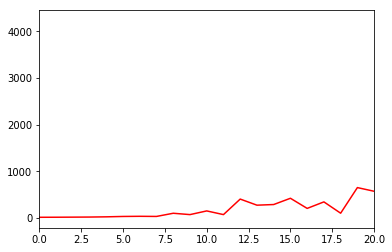

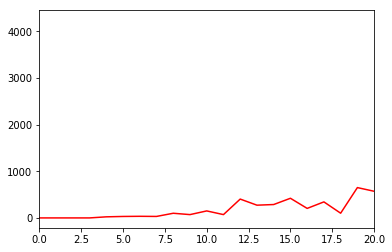

In [14]:
print(abs(freqGauche))
j = 0
k = 0
for i in freqGauche:
    if abs(i) < 20:
        j += 1
    else:
        k +=1
print(j, k)
print(freqGauche)
print(type(freqGauche))
gaucheFreqTrait = intervalleSuppr(freqGauche)
droiteFreqTrait = intervalleSuppr3(freqDroite)
print(gaucheFreqTrait)
print("ABS")
print(abs(gaucheFreqTrait))
#c = asarray([1 + 1j * 3, 20+1j*4])
j = 0
k = 0
for i in gaucheFreqTrait:
    if abs(i) < 20:
        j += 1
    else:
        k += 1
print(j, k)
#gaucheFreqTrait = intervalleSuppr3(freqGauche)
print(gaucheFreqTrait)
j = 0
k = 0
for i in gaucheFreqTrait:
    if abs(i) != 0:
        j += 1
    else:
        k +=1
print(j, k)
b = len(freqDroite) / 2 #pour la symétrie
plt.plot(abs(freqGauche[:(int(b)-1)]), 'r')
d = len(droiteFreqTrait) / 2
xlim(0, 20)
figure()
plt.plot(abs(gaucheFreqTrait[:(int(d)-1)]),'r')
xlim(0, 20)

In [15]:
def make_stereo(left, right):
    stereo = []
    for i in range(0, len(left)):
        stereo += [[left[i]] + [right[i]]]
    return asarray(stereo, dtype = np.int16)

/home/parallels/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


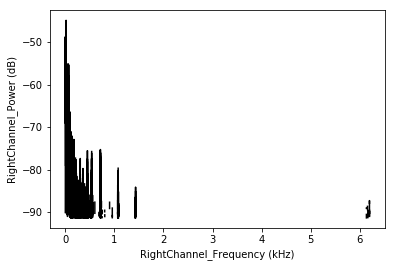

In [16]:
X = gaucheFreqTrait
m = len(X)
p2 = X / float(m) # scale by the number of points so that
                  # the magnitude does not depend on the length 
                  # of the signal or on its sampling frequency  
p2 = p2**2  # square it to get the power
mUniquePts = int(ceil((m+1)/2.0))# recupère la moitié du spectre
p2 = p2[0:mUniquePts]
p2 = abs(p2)
if m % 2 > 0: # we've got odd number of points fft
    p2[1:len(p2)] = p2[1:len(p2)] * 2
else:
    p2[1:len(p2) -1] = p2[1:len(p2) - 1] * 2 # we've got even number of points fft
freqArray2 = arange(0, mUniquePts, 1.0) * (freq / m);
plt.plot(freqArray2/1000, 10*log10(p2), color='k')
plt.xlabel('RightChannel_Frequency (kHz)')
plt.ylabel('RightChannel_Power (dB)')
plt.show()